In [1]:
# Importando bibliotecas
import pandas as pd
import statistics as sts
import seaborn as srn

In [2]:
# Importando dados
dataset = pd.read_csv('../csv/vendas_nivel2.csv', sep=',')

# Mostrando o HEAD
dataset.head()

,Produto,Preço,Quantidade,Categoria,Vendido_em
0,TV,2000,3.0,Eletronico,2022-01-10
1,Geladeira,-1500,2.0,Eletrodomestico,2022-01-11
2,Notebook,3500,NaN,ELETRÔNICO,2022-01-13
3,Celular,1200,10.0,menos,NaN
4,Fone,200,0.0,Eletronico,2022-01-15


In [3]:
# Conferindo se tem dados nulos
dataset.isnull().sum()

Produto       0
Preço         0
Quantidade    1
Categoria     0
Vendido_em    1
dtype: int64

In [4]:
# Verificando se há duplicatas
dataset.duplicated().sum()

np.int64(0)

# Preço

Text(0.5, 1.0, 'Preço')

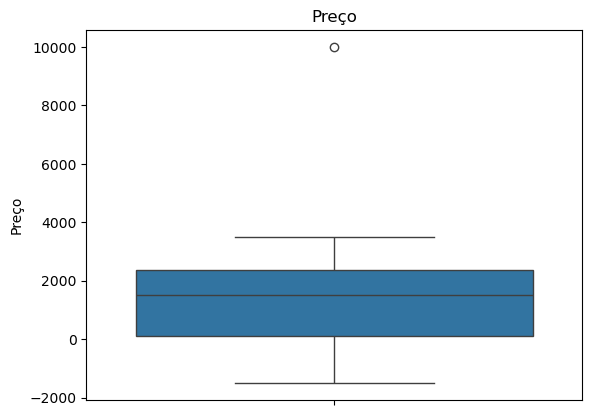

In [5]:
# Analizando os gráficos dos preços
srn.boxplot(dataset["Preço"]).set_title('Preço')

Pontos a analizar:
- Itens com preço negativo
- Dependendo do item o preço é exorbitante

In [6]:
# Analizando os itens com preço negativo ou maior que 4000
dataset.loc[(dataset["Preço"] < 0)|(dataset["Preço"] > 4000)]

,Produto,Preço,Quantidade,Categoria,Vendido_em
1,Geladeira,-1500,2.0,Eletrodomestico,2022-01-11
7,Notebook,10000,1.0,ELETRONICO,2022-01-19


Analizando o preço, um notebook atualmente fica entorno desse preço, então não considerarei 10000 um preço exorbitante!

In [7]:
# Pegando a mediana dos preços
mediana = sts.median(dataset["Preço"]) 
mediana

1500.0

In [8]:
# Trocando preço negativo pela mediana
dataset.loc[dataset["Preço"] < 0, "Preço"] = mediana

In [9]:
# Verificando
dataset.loc[dataset["Preço"]<0]

,Produto,Preço,Quantidade,Categoria,Vendido_em


# Quantidade

In [10]:
# Tratando valores faltantes
# Pegando a moda da quantidade
moda = sts.mode(dataset["Quantidade"])
moda

2.0

In [11]:
# Substituindo NaN pela moda
dataset.fillna({"Quantidade": moda}, inplace=True)

# Categoria

In [12]:
# Verificando as categorias
agrupado = dataset.groupby(["Categoria"]).size()
agrupado

Categoria
ELETRONICO         1
ELETRÔNICO         1
Eletrodomestico    2
Eletrodoméstico    1
Eletronico         2
eletrônico         1
menos              2
dtype: int64

In [13]:
# Padronizando categorias
dataset.loc[dataset["Categoria"].isin(['ELETRONICO', 'Eletronico', 'eletrônico', 'ELETRÔNICO']), "Categoria"] = 'ELETRÔNICO'

In [14]:
dataset.loc[dataset["Categoria"].isin(['Eletrodomestico', 'Eletrodoméstico']), "Categoria"] = 'ELETRODOMÉSTICO'

In [15]:
# Pegando a moda para trocar o menos
moda = sts.mode(dataset["Categoria"])
moda

'ELETRÔNICO'

In [16]:
# Substituindo
dataset.loc[dataset["Categoria"] == "menos", "Categoria"] = moda

In [17]:
# checkando
agrupado = dataset.groupby(["Categoria"]).size()
agrupado

Categoria
ELETRODOMÉSTICO    3
ELETRÔNICO         7
dtype: int64

# Vendido em..

In [21]:
# Vendo se tem valores nulos
dataset['Vendido_em'].isnull().sum()

np.int64(1)

In [23]:
# colocando data aproximada
dataset.fillna({"Vendido_em":'2022-01-12'}, inplace=True)

# Consistência entre quantidade e Vendas

In [25]:
# Vendo o head do arquivo
dataset.head()

,Produto,Preço,Quantidade,Categoria,Vendido_em
0,TV,2000,3.0,ELETRÔNICO,2022-01-10
1,Geladeira,1500,2.0,ELETRODOMÉSTICO,2022-01-11
2,Notebook,3500,2.0,ELETRÔNICO,2022-01-13
3,Celular,1200,10.0,ELETRÔNICO,2022-01-12
4,Fone,200,0.0,ELETRÔNICO,2022-01-15


In [28]:
dataset["Vendas"] = (dataset["Preço"] * dataset["Quantidade"])

In [29]:
dataset.head()

,Produto,Preço,Quantidade,Categoria,Vendido_em,Vendas
0,TV,2000,3.0,ELETRÔNICO,2022-01-10,6000.0
1,Geladeira,1500,2.0,ELETRODOMÉSTICO,2022-01-11,3000.0
2,Notebook,3500,2.0,ELETRÔNICO,2022-01-13,7000.0
3,Celular,1200,10.0,ELETRÔNICO,2022-01-12,12000.0
4,Fone,200,0.0,ELETRÔNICO,2022-01-15,0.0
